# Comparing Car Prices
*Pranav Shah*

## Introduction

In the following report we'll examine car prices by running several hypothesis tests to compare 1. normality and 2. means stratified by groups. We'll apply both graphical and formal hypothesis tests evaluations in our comparison of car price. 

## Summary


## Get Data

To start we'll get our automobile data from the a csv pre-loaded into the working folder. To prepare the data, we restructure a few columns to a numeric datatype and remove incomplete cases. Additionally, we'll add a log price column to our data and examine the overall structure of the data. 

In [1]:
# get data
read.auto = function(file = 'Automobile price data _Raw_.csv'){
  ## Read the csv file
  auto.price <- read.csv(file, header = TRUE, 
                         stringsAsFactors = FALSE)
  
  ## Coerce some character columns to numeric
  numcols <- c('price', 'bore', 'stroke', 'horsepower', 'peak.rpm')
  auto.price[, numcols] <- lapply(auto.price[, numcols], as.numeric)
  
  ## Remove cases or rows with missing values. In this case we keep the 
  ## rows which do not have nas. 
  auto.price[complete.cases(auto.price), ]
}
auto.price = read.auto()

auto.price$log.price <- log(auto.price$price) # add log price

str(auto.price)

Warning message in lapply(auto.price[, numcols], as.numeric):
“NAs introduced by coercion”Warning message in lapply(auto.price[, numcols], as.numeric):
“NAs introduced by coercion”Warning message in lapply(auto.price[, numcols], as.numeric):
“NAs introduced by coercion”Warning message in lapply(auto.price[, numcols], as.numeric):
“NAs introduced by coercion”Warning message in lapply(auto.price[, numcols], as.numeric):
“NAs introduced by coercion”

'data.frame':	195 obs. of  27 variables:
 $ symboling        : int  3 3 1 2 2 2 1 1 1 2 ...
 $ normalized.losses: chr  "?" "?" "?" "164" ...
 $ make             : chr  "alfa-romero" "alfa-romero" "alfa-romero" "audi" ...
 $ fuel.type        : chr  "gas" "gas" "gas" "gas" ...
 $ aspiration       : chr  "std" "std" "std" "std" ...
 $ num.of.doors     : chr  "two" "two" "two" "four" ...
 $ body.style       : chr  "convertible" "convertible" "hatchback" "sedan" ...
 $ drive.wheels     : chr  "rwd" "rwd" "rwd" "fwd" ...
 $ engine.location  : chr  "front" "front" "front" "front" ...
 $ wheel.base       : num  88.6 88.6 94.5 99.8 99.4 ...
 $ length           : num  169 169 171 177 177 ...
 $ width            : num  64.1 64.1 65.5 66.2 66.4 66.3 71.4 71.4 71.4 64.8 ...
 $ height           : num  48.8 48.8 52.4 54.3 54.3 53.1 55.7 55.7 55.9 54.3 ...
 $ curb.weight      : int  2548 2548 2823 2337 2824 2507 2844 2954 3086 2395 ...
 $ engine.type      : chr  "dohc" "dohc" "ohcv" "ohc" ...
 $ num.o

## Compare normality

In the following section we'll compare price and log price to a normal distribution. 

### Q-Q Plots
First, we'll look at this graphically through a Q-Q plot, which helps determine if price or log price come from similar distributions, in this case a normal distribution. When applying these plots we want to standardize price and log price through the scale function to make comparisons on a similar order. From the Q-Q plots below, we see that log price seems to be more normally distributed (right graph) because it follows the normal distribution line more closely than price, shown on the left.

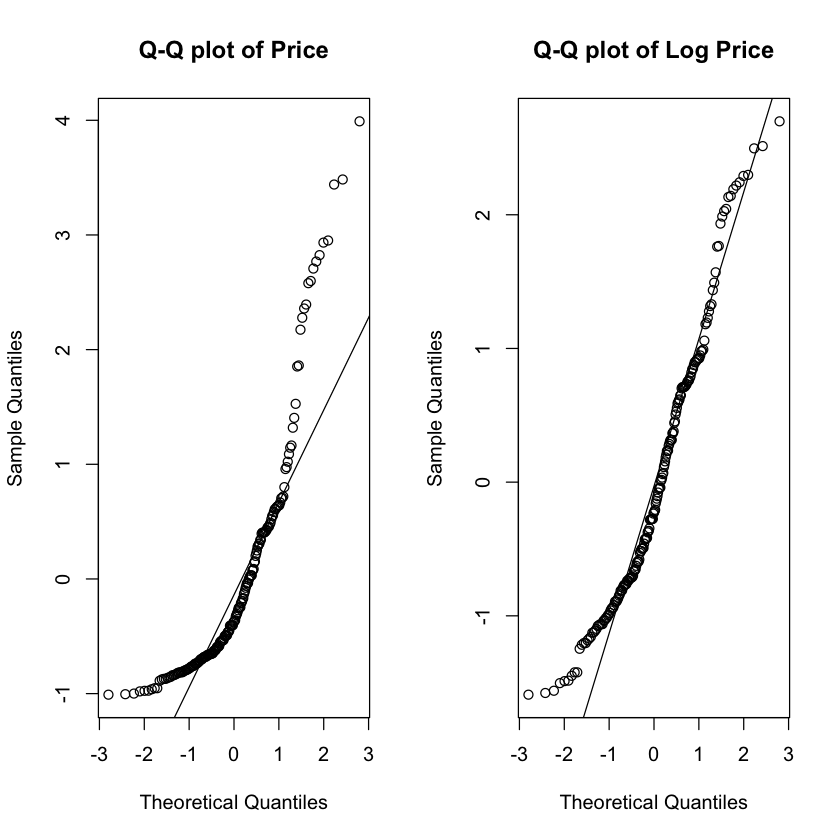

In [2]:
# Q-Q plots 
par(mfrow = c(1, 2))

qqnorm(scale(auto.price$price), main = 'Q-Q plot of Price')
qqline(scale(auto.price$price))

qqnorm(scale(auto.price$log.price), main = 'Q-Q plot of Log Price')
qqline(scale(auto.price$log.price))

par(mfrow = c(1, 1))

### Kolmogorov–Smirnov test

Next we'll use the Kolmogorov Smirnov tests to compare the both price and log price to a data set obtained randomly from a normal distribution. In this test we are comparing the cumulative density functions of both distributions and looking for the maximum deviation, which is the KS statistic.

#### Graphical assesment
The function below calculates the cumulative density functions for both input distributions and measures then returns the maximum difference between the two distributions. It can also plot the normal and price densities against each other. In the following example, the two side by side plots show that the price density function has a greater max difference between the random normal than the log price. Note that the black line is smaller in the right hand (log price) graph than the left hand, price graph. The calculated KS statistic that is printed also shows that log price is about 0.0667 vs. 0.179 for price. What this means is that the log price is more similar to normal distribution than price.

,KS Statistic
Price,0.17948718
log(Price),0.06666667


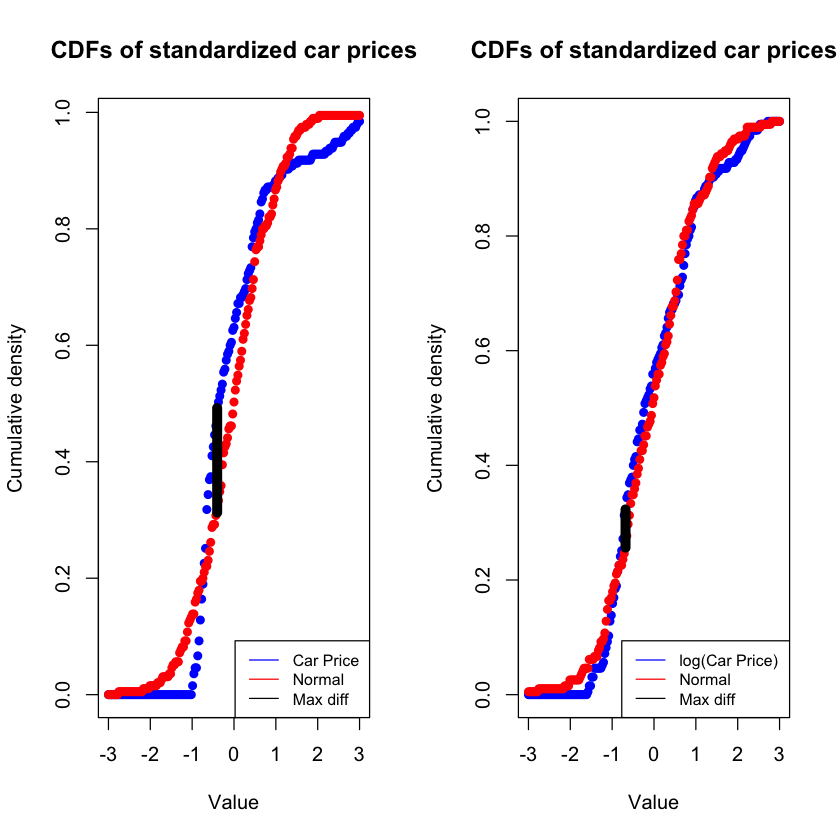

In [4]:
# Create k-s statistic function
ks_stat <- function(x_min,x_max, dist_a, dist_b, makeplot = FALSE, labels = c("Price","Normal Dist.")){
  x_seq <- seq(x_min,x_max,len=length(dist_a))
  y_cdf1 <- sapply(x_seq, function(x){
    sum(dist_a<x)/length(dist_a)
  })
  y_cdf2 <- sapply(x_seq, function(x){
    sum(dist_b<x)/length(dist_b)
  })
  k_s_stat <- max(abs(y_cdf1-y_cdf2))
  
  if (makeplot == TRUE){
    k_index <- which.max(abs(y_cdf1-y_cdf2))
    k_s_x <- x_seq[k_index]
    plot(x_seq,y_cdf1, col='blue', pch=16, main ='CDFs of standardized car prices', 
         xlab = 'Value', ylab = 'Cumulative density')
    points(x_seq,y_cdf2,col='red', pch=16) 
    lines(c(k_s_x,k_s_x), c(y_cdf1[k_index],y_cdf2[k_index]),
          col='black', lwd=8)
    legend("bottomright", legend = c(labels, c("Max diff")), col = c("blue", "red", "black"),lty = 1, cex = 0.8)
  }
  return(k_s_stat)
}

par(mfrow = c(1, 2))

dist_a <- scale(auto.price$price)
dist_b <- rnorm(length(auto.price$price), 0, 1)
a <- ks_stat(-3, 3, dist_a, dist_b, makeplot = TRUE, labels = c("Car Price", "Normal"))

dist_a <- scale(auto.price$log.price)
dist_b <- rnorm(length(auto.price$log.price), 0, 1)
b <- ks_stat(-3, 3, dist_a, dist_b, makeplot = TRUE, labels = c("log(Car Price)", "Normal"))

c <- as.data.frame(rbind(a,b))
row.names(c) <- c("Price", "log(Price)")
colnames(c) <- c("KS Statistic")
c

par(mfrow = c(1, 1))

#### KS statistic - Iterations 

Since the above function utilizes a random sampling from a normal distribution to compare to both the cumalitive densities of price and log price, it is important to run several iterations of the function above in order to get an averaged approximation of the KS statistic. From the histograms below we can get the mean of what the expected KS statistic would be for a price to normal distribution and log price to normal distribution. For price to a normal distribution, we see that the mean KS statistic is between .15 and .20, while for log price the mean KS statistic is between .10 and .15. This tends to confirm that it is likely that log price is more similar to a normal distribution than price is to a normal distribution.


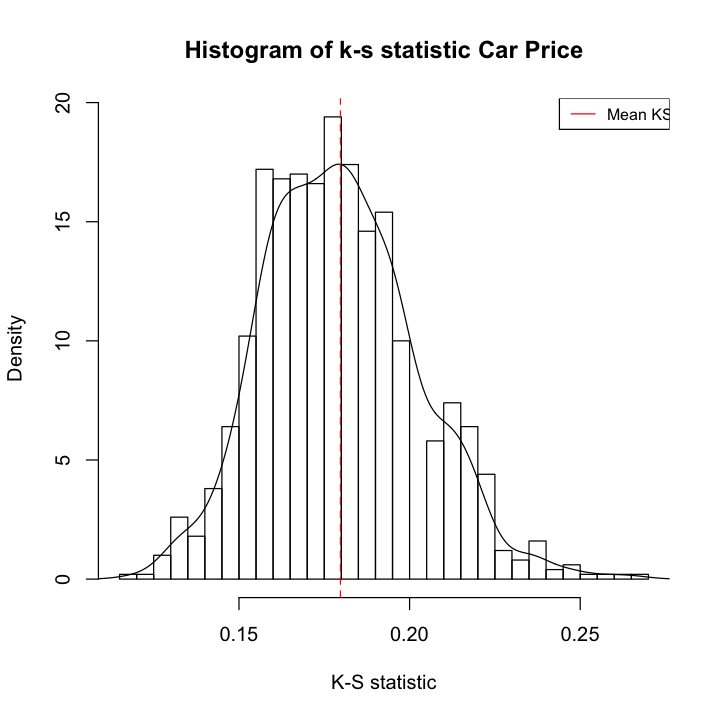

In [12]:
##----Repeat N Times-----
N <- 1000
k_s_rep <- sapply(1:N, function(i){
  dist_a <- scale(auto.price$price)
  dist_b <- rnorm(length(auto.price$price), 0, 1)
  return(ks_stat(-3, 3, dist_a, dist_b))
})

require(repr)
options(repr.plot.width=6, repr.plot.height=6)

hist(k_s_rep, breaks=30, freq=FALSE, xlab = 'K-S statistic',
     main = 'Histogram of k-s statistic Car Price')
lines(density(k_s_rep))
abline(v = mean(k_s_rep), col = c("red"), lty = 2)
legend("topright", legend = c("Mean KS"), col = c("red"),lty = 1, cex = 0.8)

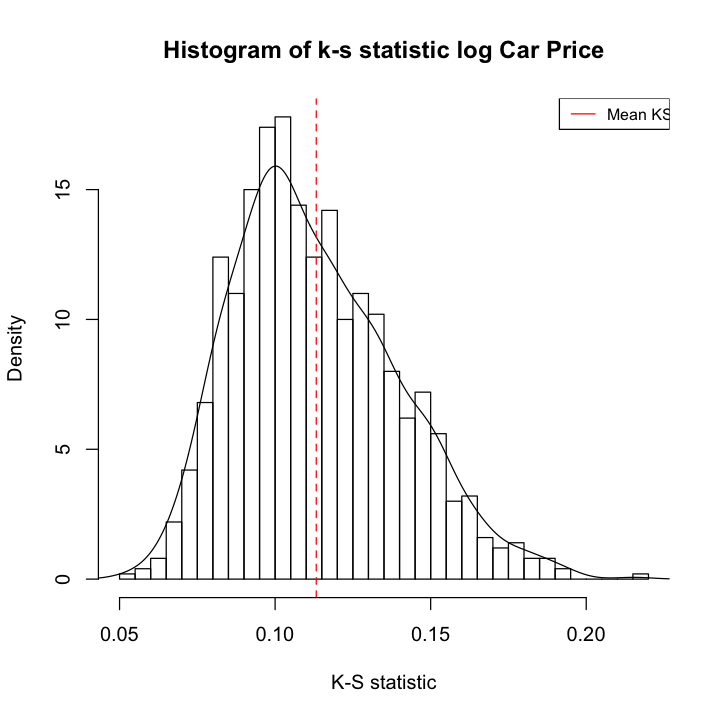

In [11]:
##----Repeat N Times-----
N <- 1000
k_s_rep <- sapply(1:N, function(i){
  dist_a <- scale(auto.price$log.price)
  dist_b <- rnorm(length(auto.price$log.price), 0, 1)
  return(ks_stat(-3, 3, dist_a, dist_b))
})

require(repr)
options(repr.plot.width=6, repr.plot.height=6)

hist(k_s_rep, breaks=30, freq=FALSE, xlab = 'K-S statistic',
     main = 'Histogram of k-s statistic log Car Price')
lines(density(k_s_rep))
abline(v = mean(k_s_rep), col = c("red"), lty = 2)
legend("topright", legend = c("Mean KS"), col = c("red"),lty = 1, cex = 0.8)

#### KS formal hypothesis test 

Using the formal hypothesis tests helps us approximate whether two distributions are drawn from the same distribution, in this case a normal distribution. When evaluating these tests, our null hypothesis is that the distributions are from the same reference distribution. A p-value of less than 0.05 tells us that we can reject the null hypothesis and accept that two comparison distributions are likely from different reference distributions. 

In the following two tests for price and log price compared to a random normal sample of the same length, the log price shows that we can not reject the null hypothesis (p-value = 0.13). This means we can accept that log price is from a normal distribution. When testing price against a random normal sample, we can reject the null (p-value = 2.3 e-4) meaning that price is from a different distribution.

From our graphical assesments and tests, we can conclude that log price is closer to a normal distribution than price, thus further analysis in this report will include only log price. 

In [21]:
ks.test(scale(auto.price$price), rnorm(length(auto.price$price), 0, 1), alternative = "two.sided")
ks.test(scale(auto.price$log.price), rnorm(length(auto.price$log.price), 0, 1), alternative = "two.sided")

Warning message in ks.test(scale(auto.price$price), rnorm(length(auto.price$price), :
“p-value will be approximate in the presence of ties”


	Two-sample Kolmogorov-Smirnov test

data:  scale(auto.price$price) and rnorm(length(auto.price$price), 0, 1)
D = 0.21538, p-value = 0.0002357
alternative hypothesis: two-sided


Warning message in ks.test(scale(auto.price$log.price), rnorm(length(auto.price$log.price), :
“p-value will be approximate in the presence of ties”


	Two-sample Kolmogorov-Smirnov test

data:  scale(auto.price$log.price) and rnorm(length(auto.price$log.price), 0, 1)
D = 0.11795, p-value = 0.1327
alternative hypothesis: two-sided
